# Hemocell One Cell Shear Simulation UQ Analysis

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from local_config import *

## Read data and results

In [2]:
# Load results from posterior sampling
sample_df = pd.read_csv("hemocell_samples.csv",sep=";")
qoi = np.load("hemocell_qoi.npy")

# Load data for comparison with results
data = pd.read_csv("%s/Ekcta_100.csv" % (datapath),sep=";")
data = data.loc[data["Treatment"] == 1.0]
stress,el,el_err = data.values[:12,[1,3,4]].T

In [3]:
print(data)
print(sample_df)

    Treatment  Stress (pa)  EL Healthy  EL 100%  EL error (+/-)
0         1.0         0.30       0.038    0.020           0.002
1         1.0         0.44       0.077    0.042           0.002
2         1.0         0.64       0.151    0.072           0.002
3         1.0         0.93       0.196    0.085           0.002
4         1.0         1.36       0.268    0.080           0.003
5         1.0         1.99       0.332    0.054           0.002
6         1.0         2.91       0.389    0.031           0.003
7         1.0         4.24       0.441    0.018           0.002
8         1.0         6.19       0.485    0.018           0.002
9         1.0         9.04       0.521    0.019           0.001
10        1.0        13.20       0.549    0.024           0.001
11        1.0        19.28       0.576    0.029           0.001
12        1.0        28.15       0.598    0.031           0.001
13        1.0        41.10       0.620    0.029           0.001
14        1.0        60.00       0.639  

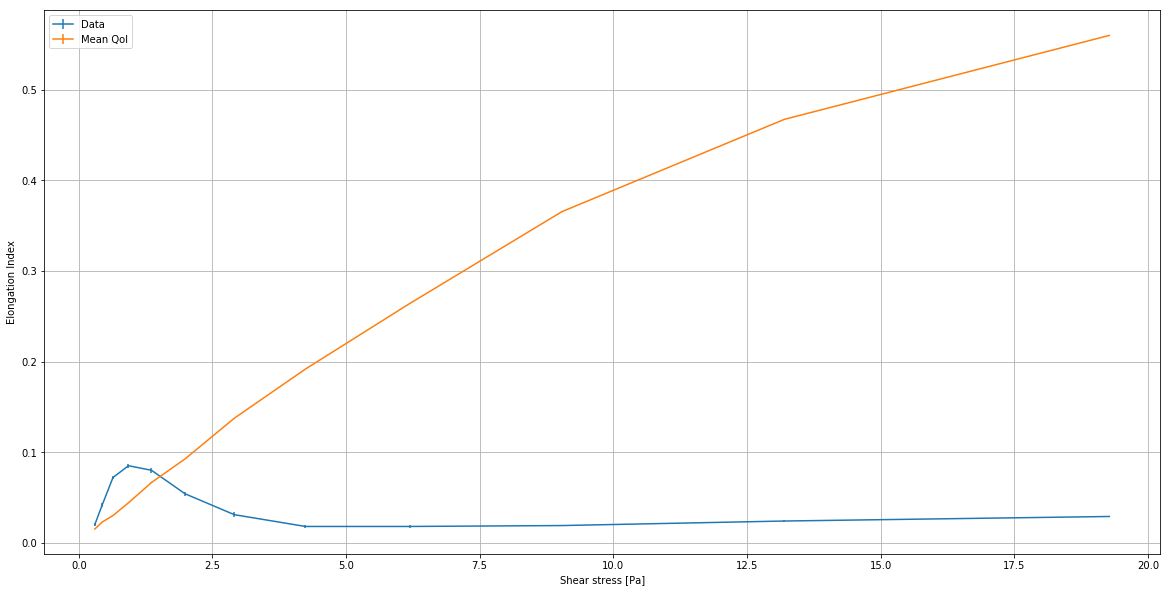

In [4]:
plt.figure(figsize=(20,10))
plt.xlabel("Shear stress [Pa]")
plt.ylabel("Elongation Index")

plt.grid(True)

# Data
plt.errorbar(stress,el,yerr=el_err,label="Data")

# Highest likelihood
mle = np.argmax(sample_df["likelihood"].values)
#plt.plot(stress,qoi[mle],label="Max Likelihood Sample")

# Mean QoI output
mean = np.mean(qoi,axis=0)
var = np.sum((qoi - mean[None,:])**2,axis=0) / (qoi.shape[0] - 1)
conf = 1.96 * np.sqrt(var / qoi.shape[0])

plt.errorbar(stress,mean,yerr=conf,label="Mean QoI")

plt.legend()

plt.show()

## Plot parameter histograms

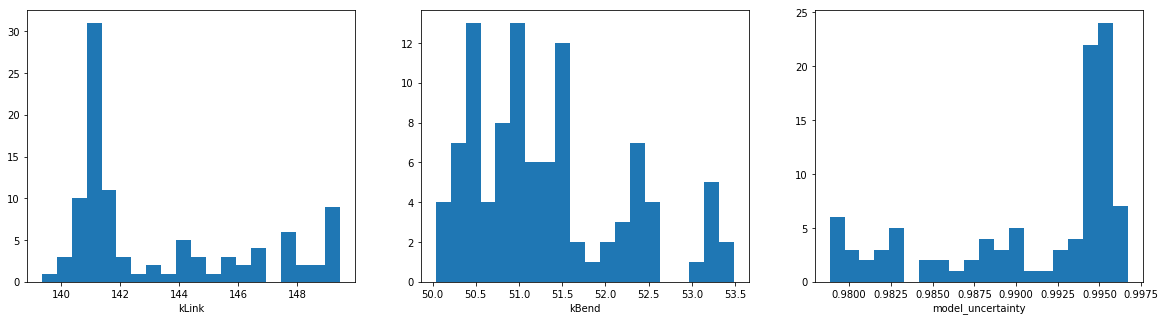

In [5]:
nbins = 20

plt.figure(figsize=(20,5))
plt.grid(True)

plt.subplot(1,3,1)
plt.xlabel("kLink")
plt.hist(sample_df["kLink"].values,bins=nbins)

plt.subplot(1,3,2)
plt.xlabel("kBend")
plt.hist(sample_df["kBend"].values,bins=nbins)

plt.subplot(1,3,3)
plt.xlabel("model_uncertainty")
plt.hist(sample_df["model_uncertainty"].values,bins=nbins)

plt.show()

## Plot parameters against each other in 2D

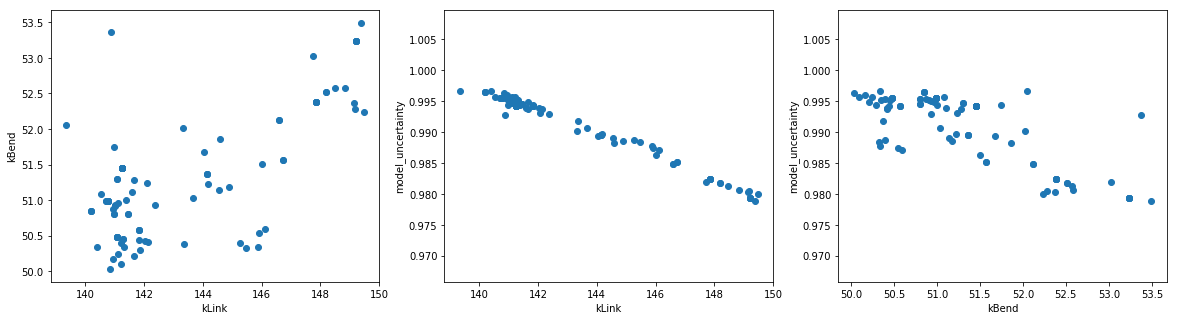

In [6]:
plt.figure(figsize=(20,5))
plt.grid(True)

plt.subplot(1,3,1)
plt.xlabel("kLink")
plt.ylabel("kBend")
plt.scatter(sample_df["kLink"].values,sample_df["kBend"].values)

plt.subplot(1,3,2)
plt.xlabel("kLink")
plt.ylabel("model_uncertainty")
plt.scatter(sample_df["kLink"].values,sample_df["model_uncertainty"].values)

plt.subplot(1,3,3)
plt.xlabel("kBend")
plt.ylabel("model_uncertainty")
plt.scatter(sample_df["kBend"].values,sample_df["model_uncertainty"].values)

plt.show()